# HW4

In [1]:
# Common imports
import numpy as np
import pandas as pd


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Q1. Visualize the univariate distribution of each continuous feature, and the distribution of the target.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data = data.copy()
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

cont_data = data[["MonthlyCharges","TotalCharges"]]
cont_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  7043 non-null   float64
 1   TotalCharges    7032 non-null   float64
dtypes: float64(2)
memory usage: 110.2 KB


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

(array([0.05018214, 0.00818003, 0.00970584, 0.00351784, 0.00178011,
        0.00279732, 0.00372975, 0.00614562, 0.00559463, 0.01220647,
        0.00788334, 0.00699329, 0.00923962, 0.00546748, 0.00534033,
        0.01593622, 0.01250315, 0.00949392, 0.01822493, 0.01199455,
        0.01017206, 0.01555477, 0.01250315, 0.0087734 , 0.01377466,
        0.01059589, 0.00775619, 0.00703567, 0.00322115, 0.00220395]),
 array([ 18.25,  21.6 ,  24.95,  28.3 ,  31.65,  35.  ,  38.35,  41.7 ,
         45.05,  48.4 ,  51.75,  55.1 ,  58.45,  61.8 ,  65.15,  68.5 ,
         71.85,  75.2 ,  78.55,  81.9 ,  85.25,  88.6 ,  91.95,  95.3 ,
         98.65, 102.  , 105.35, 108.7 , 112.05, 115.4 , 118.75]),
 <BarContainer object of 30 artists>)

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

Text(0.5, 1.0, 'Univariate Distribution of MonthlyCharges with Density Plot')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency/Density')

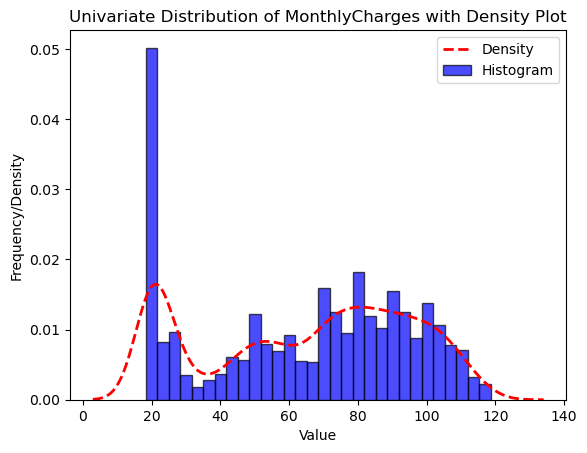

In [6]:
plt.hist(cont_data["MonthlyCharges"], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
sns.kdeplot(cont_data["MonthlyCharges"], color='red', linestyle='dashed', linewidth=2)
plt.title('Univariate Distribution of MonthlyCharges with Density Plot')
plt.xlabel('Value')
plt.ylabel('Frequency/Density')
plt.legend(['Density', 'Histogram'])
plt.show()


(array([7.50746907e-04, 3.30820932e-04, 2.52054044e-04, 2.25470219e-04,
        2.23501046e-04, 1.55564605e-04, 1.35872883e-04, 9.89509038e-05,
        9.55048524e-05, 8.36898191e-05, 8.81204566e-05, 7.82745956e-05,
        7.23670789e-05, 7.97514747e-05, 7.13824928e-05, 6.69518553e-05,
        7.82745956e-05, 5.75982873e-05, 5.95674595e-05, 7.18747859e-05,
        6.30135109e-05, 5.31676498e-05, 5.02138915e-05, 4.92293054e-05,
        4.08603235e-05, 3.64296860e-05, 3.24913415e-05, 3.15067554e-05,
        1.77225499e-05, 1.08304472e-05]),
 array([  18.8       ,  307.66666667,  596.53333333,  885.4       ,
        1174.26666667, 1463.13333333, 1752.        , 2040.86666667,
        2329.73333333, 2618.6       , 2907.46666667, 3196.33333333,
        3485.2       , 3774.06666667, 4062.93333333, 4351.8       ,
        4640.66666667, 4929.53333333, 5218.4       , 5507.26666667,
        5796.13333333, 6085.        , 6373.86666667, 6662.73333333,
        6951.6       , 7240.46666667, 7529.333

<Axes: xlabel='TotalCharges', ylabel='Density'>

Text(0.5, 1.0, 'Univariate Distribution of TotalCharges with Density Plot')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency/Density')

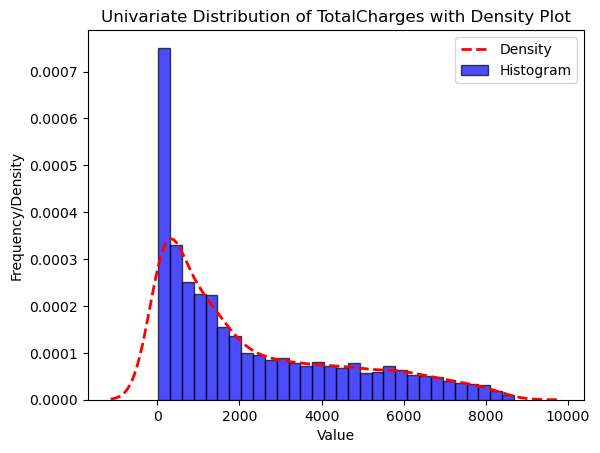

In [7]:
plt.hist(cont_data["TotalCharges"], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
sns.kdeplot(cont_data["TotalCharges"], color='red', linestyle='dashed', linewidth=2)
plt.title('Univariate Distribution of TotalCharges with Density Plot')
plt.xlabel('Value')
plt.ylabel('Frequency/Density')
plt.legend(['Density', 'Histogram'])
plt.show()

<Axes: xlabel='Churn'>

Text(0.5, 0, 'Churn')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Churn Count Bar Graph')

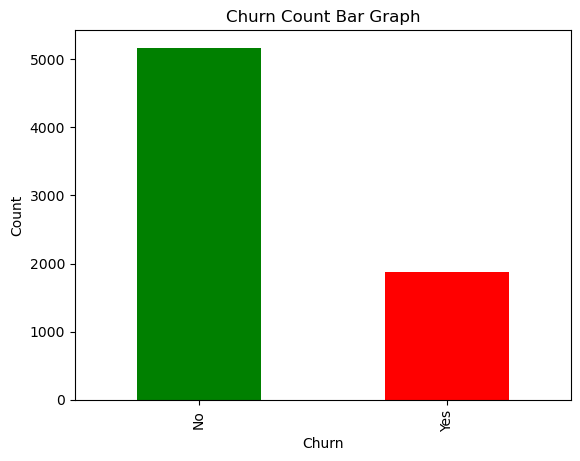

In [8]:
churn_counts = data.groupby("Churn").count()["customerID"]

# Plotting a bar graph
churn_counts.plot(kind='bar', color=['green', 'red'])  # Assuming 'Churn' has values 'No' and 'Yes'
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count Bar Graph')
plt.show()

### Q2. Split data into training (90%) and test set (10%) using random state = 0. Build a pipeline for dealing with categorical variables. Evaluate Logistic Regression, linear support vector machines and nearest neighbors using 5-fold cross-validation with their default parameters. How different are the results? How does scaling the continuous features with StandardScaler influence the results?

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop("Churn", axis=1)
y = data["Churn"]
X.shape

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,y, test_size=0.1, random_state=0)


(7043, 20)

In [10]:
col_cat = data.columns.tolist()
col_cat.remove("customerID")
col_cat.remove("MonthlyCharges")
col_cat.remove("TotalCharges")
col_cat.remove("Churn")

col_num = ["MonthlyCharges","TotalCharges"]


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler


pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), 
                         OneHotEncoder(handle_unknown="ignore"))
pipe_num_noss = make_pipeline(SimpleImputer())
preprocessor_noss = make_column_transformer( (pipe_cat,col_cat) , (pipe_num_noss,col_num) )

pipe_num_ss = make_pipeline(StandardScaler(), SimpleImputer())
preprocessor_ss = make_column_transformer( (pipe_cat,col_cat) , (pipe_num_ss,col_num) )


In [12]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

pipe_log1 = make_pipeline(preprocessor_noss, 
                         LogisticRegression(solver='lbfgs', max_iter=100000, random_state=0))
pipe_svm1 = make_pipeline(preprocessor_noss, 
                         LinearSVC(C=1.0, max_iter=100000, random_state=0))
pipe_knn1 = make_pipeline(preprocessor_noss, KNeighborsClassifier(n_neighbors=5))

scores_log1 = cross_validate(pipe_log1, X_train_val, y_train_val,
                 cv=5, return_train_score=True)
scores_svm1 = cross_validate(pipe_svm1, X_train_val, y_train_val,
                 cv=5, return_train_score=True)
scores_knn1 = cross_validate(pipe_knn1, X_train_val, y_train_val,
                 cv=5, return_train_score=True)

result_log1 = pd.DataFrame(scores_log1)
result_svm1 = pd.DataFrame(scores_svm1)
result_knn1 = pd.DataFrame(scores_knn1)


c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expl

In [27]:
print(result_log1)
print("\nMean times and scores of LogisticRegression without standard scalar:\n", result_log1.mean())

pipe_log1.fit(X_train_val, y_train_val)
log1_accuracy = pipe_log1.score(X_test, y_test)
print("\nTest scores of LogisticRegression without standard scalar: ", log1_accuracy)

   fit_time  score_time  test_score  train_score
0  0.211746    0.010002    0.804416     0.812426
1  0.160808    0.011002    0.819401     0.810059
2  0.120718    0.010507    0.813091     0.809467
3  0.075019    0.010003    0.796369     0.809308
4  0.084638    0.010003    0.805051     0.809308

Mean times and scores of LogisticRegression without standard scalar:
 fit_time       0.130586
score_time     0.010303
test_score     0.807666
train_score    0.810114
dtype: float64


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=100000, random_state=0))])


Test scores of LogisticRegression without standard scalar:  0.7929078014184398


In [28]:
print(result_svm1)
print("\nMean times and scores of SVM without standard scalar:\n", result_svm1.mean())

pipe_svm1.fit(X_train_val, y_train_val)
svm1_accuracy = pipe_svm1.score(X_test, y_test)
print("\nTest scores of SVM without standard scalar: ", svm1_accuracy)

    fit_time  score_time  test_score  train_score
0  19.982371    0.008999    0.787855     0.790533
1  19.684724    0.011003    0.543375     0.527416
2  19.533009    0.009002    0.788644     0.791716
3  20.169722    0.010002    0.789266     0.804772
4  20.157180    0.009002    0.779006     0.787813

Mean times and scores of SVM without standard scalar:
 fit_time       19.905401
score_time      0.009602
test_score      0.737629
train_score     0.740450
dtype: float64


c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges'])])),
                ('linearsvc', LinearSVC(max_iter=100000, random_state=0))])


Test scores of SVM without standard scalar:  0.7730496453900709


In [29]:
print(result_knn1)
print("\nMean times and scores of KNN without standard scalar:\n", result_knn1.mean())

pipe_knn1.fit(X_train_val, y_train_val)
knn1_accuracy = pipe_knn1.score(X_test, y_test)
print("\nTest scores of KNN without standard scalar: ", knn1_accuracy)

   fit_time  score_time  test_score  train_score
0  0.030008    0.570666    0.764984     0.832939
1  0.032890    0.513731    0.764984     0.827219
2  0.031007    0.425614    0.768139     0.832544
3  0.030511    0.421620    0.749013     0.837705
4  0.029006    0.432109    0.759274     0.831789

Mean times and scores of KNN without standard scalar:
 fit_time       0.030684
score_time     0.472748
test_score     0.761279
train_score    0.832439
dtype: float64


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])


Test scores of KNN without standard scalar:  0.7475177304964539


In [16]:
pipe_log2 = make_pipeline(preprocessor_ss, 
                         LogisticRegression(solver='lbfgs', max_iter=100000, random_state=0))
pipe_svm2 = make_pipeline(preprocessor_ss, 
                         LinearSVC(C=1.0, max_iter=100000, random_state=0))
pipe_knn2 = make_pipeline(preprocessor_ss, KNeighborsClassifier(n_neighbors=5))


scores_log2 = cross_validate(pipe_log2, X_train_val, y_train_val,
                 cv=5, return_train_score=True)
scores_svm2 = cross_validate(pipe_svm2, X_train_val, y_train_val,
                 cv=5, return_train_score=True)
scores_knn2 = cross_validate(pipe_knn2, X_train_val, y_train_val,
                 cv=5, return_train_score=True)

result_log2 = pd.DataFrame(scores_log2)
result_svm2 = pd.DataFrame(scores_svm2)
result_knn2 = pd.DataFrame(scores_knn2)

c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_clas

In [30]:
print(result_log2)
print("\nMean times and scores of LogisticRegression with standard scalar:\n", result_log2.mean())

pipe_log2.fit(X_train_val, y_train_val)
log2_accuracy = pipe_log2.score(X_test, y_test)
print("\nTest scores of LogisticRegression with standard scalar: ", log2_accuracy)

   fit_time  score_time  test_score  train_score
0  0.123028    0.009002    0.802050     0.812623
1  0.100023    0.010003    0.813880     0.812032
2  0.102328    0.010051    0.802050     0.812426
3  0.093022    0.010002    0.795580     0.810491
4  0.104023    0.010002    0.805051     0.812660

Mean times and scores of LogisticRegression with standard scalar:
 fit_time       0.104485
score_time     0.009812
test_score     0.803722
train_score    0.812046
dtype: float64


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=100000, random_state=0))])


Test scores of LogisticRegression with standard scalar:  0.7900709219858156


In [32]:
print(result_svm2)
print("\nMean times and scores of LogisticRegression with standard scalar:\n", result_svm2.mean())

pipe_svm2.fit(X_train_val, y_train_val)
svm2_accuracy = pipe_svm2.score(X_test, y_test)
print("\nTest scores of SVM with standard scalar: ", svm2_accuracy)

   fit_time  score_time  test_score  train_score
0  0.172544    0.009002    0.804416     0.811243
1  0.150034    0.009002    0.810726     0.811440
2  0.122028    0.010002    0.805205     0.810256
3  0.176413    0.009002    0.794791     0.810885
4  0.190042    0.009002    0.802684     0.812463

Mean times and scores of LogisticRegression with standard scalar:
 fit_time       0.162212
score_time     0.009202
test_score     0.803564
train_score    0.811257
dtype: float64


c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges'])])),
                ('linearsvc', LinearSVC(max_iter=100000, random_state=0))])


Test scores of SVM with standard scalar:  0.7886524822695036


In [31]:
print(result_knn2)
print("\nMean times and scores of LogisticRegression with standard scalar:\n", result_knn2.mean())

pipe_knn2.fit(X_train_val, y_train_val)
knn2_accuracy = pipe_knn2.score(X_test, y_test)
print("\nTest scores of KNN with standard scalar: ", knn2_accuracy)

   fit_time  score_time  test_score  train_score
0  0.030997    0.478631    0.758675     0.842012
1  0.030397    0.449632    0.779968     0.835700
2  0.030514    0.417094    0.774448     0.838067
3  0.033006    0.476109    0.744278     0.843423
4  0.030785    0.417818    0.759274     0.842437

Mean times and scores of LogisticRegression with standard scalar:
 fit_time       0.031140
score_time     0.447857
test_score     0.763329
train_score    0.840328
dtype: float64


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])


Test scores of KNN with standard scalar:  0.7631205673758865


Without standard scaler, Logistic regression has the most accurate mean test score, followed by KNN and Linear SVM. Logistic regression has similar score between its train and test scores, suggesting it is well-fitted. Linear SVM presents a lower training and testing values than the other two methods, suggesting it is under-fitted. KNN has a high train score but a lower test score, suggesting it is over-fitted. Implementing standard scaler causes very little difference in the accuracy of the mean test scores of logistic regression and KNN, but causes a large increase in the accuracy of SVM's mean test score, converting it from an underfitted model to a well-fitted one.

### Q3: Tune the key parameters (C for Logistic Regression and linear support vector machines, and K for nearest neighbors) using GridSearchCV. Do the results improve? 
### Visualize the performance as function of the parameters for all three models

In [60]:
pipe_log3 = make_pipeline(preprocessor_ss, 
                         LogisticRegression(solver='lbfgs', max_iter=100000, random_state=0))
pipe_svm3 = make_pipeline(preprocessor_ss, 
                         LinearSVC(max_iter=100000, random_state=0))
pipe_knn3 = make_pipeline(preprocessor_ss, KNeighborsClassifier())

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid_log = {'logisticregression__C': [0.01, 0.1, 1.0, 10, 100]}
param_grid_svm = {'linearsvc__C': [0.01, 0.1, 1.0, 10, 100]}
param_grid_knn = {'kneighborsclassifier__n_neighbors':  np.arange(1, 15, 2)}

grid_log = GridSearchCV(pipe_log3, param_grid=param_grid_log, cv=5, n_jobs=-1, return_train_score=True)
grid_log.fit(X_train_val, y_train_val)

grid_svm = GridSearchCV(pipe_svm3, param_grid=param_grid_svm, cv=5, n_jobs=-1, return_train_score=True)
grid_svm.fit(X_train_val, y_train_val)

grid_knn = GridSearchCV(pipe_knn3, param_grid=param_grid_knn, cv=5, n_jobs=-1, return_train_score=True)
grid_knn.fit(X_train_val, y_train_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'tenure',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'Onl...
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=100000,
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100]},
             return_train_score=True)

c:\Users\anson\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'tenure',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'Onl...
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges'])])),
                                       ('linearsvc',
                                        LinearSVC(max_iter=100000,
                                                  random_state=0))]),
             n_jobs=-1, param_grid={'linearsvc__C': [0.01, 0.1, 1.0, 10, 100]},
             return_train_score=True)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'tenure',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'Onl...
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13])},
             return_train_score=True)

In [62]:
res_log = pd.pivot_table(pd.DataFrame(grid_log.cv_results_), values='mean_test_score', 
                     index='param_logisticregression__C')
pd.set_option("display.precision",3)
res_log = res_log.set_index(res_log.index.values.round(4))
res_log

,mean_test_score
0.01,0.804
0.10,0.807
1.00,0.804
10.00,0.802
100.00,0.801


<Axes: >

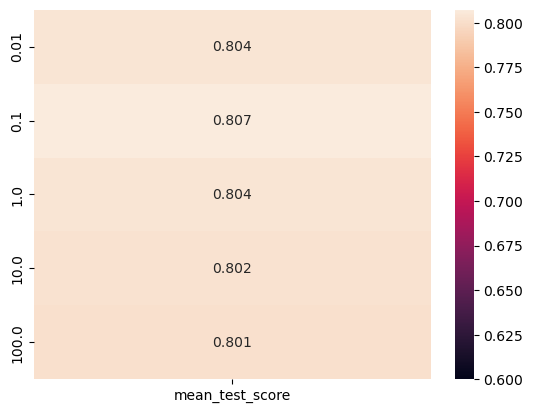

In [63]:
import seaborn as sns
sns.heatmap(res_log, annot=True, fmt=".3g", vmin=0.6)

In [64]:
res_svm = pd.pivot_table(pd.DataFrame(grid_svm.cv_results_), values='mean_test_score', 
                     index='param_linearsvc__C')
pd.set_option("display.precision",3)
res_svm = res_svm.set_index(res_svm.index.values.round(4))
res_svm

,mean_test_score
0.01,0.808
0.10,0.805
1.00,0.804
10.00,0.803
100.00,0.803


<Axes: >

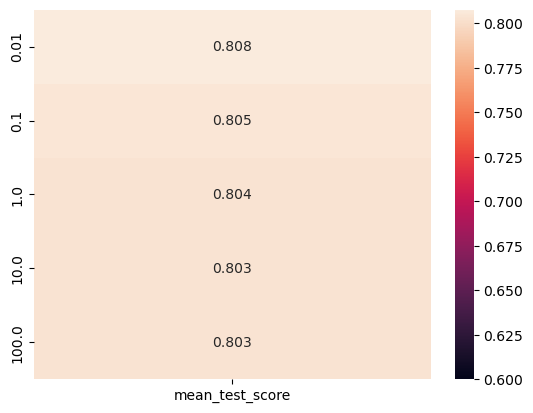

In [65]:
sns.heatmap(res_svm, annot=True, fmt=".3g", vmin=0.6)

In [66]:
res_knn = pd.pivot_table(pd.DataFrame(grid_knn.cv_results_), values='mean_test_score', 
                     index='param_kneighborsclassifier__n_neighbors')
pd.set_option("display.precision",3)
res_knn = res_knn.set_index(res_knn.index.values.round(4))
res_knn

,mean_test_score
1,0.720
3,0.756
5,0.763
7,0.771
9,0.774
11,0.778
13,0.778


<Axes: >

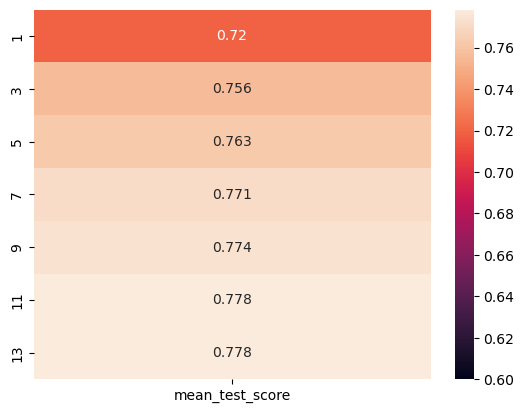

In [67]:
sns.heatmap(res_knn, annot=True, fmt=".3g", vmin=0.6)

C*L(x) + r(x)

larger C on svm: complexity go up -> overfit

smaller C on svm: complecit go down -> underfit

larger k on knn: complexity go down -> underfit

smaller k on knn: complecit go up -> overfit

For logistic heatmap, we want C equals to 0.1; larger than 0.1 tend to be over fitting and smaller than 0.1 tend to be under fitting.

For svm heatmap, we want C equals to 0.01; larger than 0.01 tend to be over fitting.

For knn heatmap, we want k equals to 13 or more than 13(to make it less complexity); smaller than 13 tend to be over fitting.

In conclusion, by tuning the parameter C and k, the model will improve a little compare to question 2 which just use default parameter.